# Solving a cubic

In this example we'll use sympy to solve a cubic polynomial using a trignometric identity.
The example brings together lots of different nice SymPy features. 
Plus, this is a nice trick for getting roots of cubics!

In [1]:
import sympy as sp
from sympy import init_printing
init_printing()

First, we'll make our polynomial:

In [2]:
x,a,b,c,d = sp.symbols("x a b c d")

In [3]:
poly = a * x*x*x + b * x*x + c * x + d
poly

Of course, we could simply use solve to get the polynomial roots...

In [4]:
solns = sp.solve(poly,x)

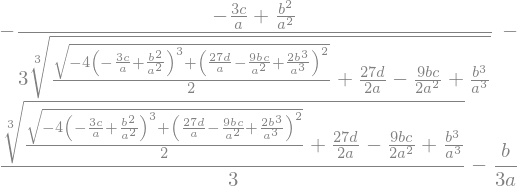

In [5]:
solns[0]

... yuck! 

Is there another way?

# Solving with the trig identity

To solve our polynomial, we will take advantage of the trig idendity:
$$
    \sin(3\theta) =  3 \sin{\left(\theta \right)}- 4 \sin^{3}{\left(\theta \right)}
$$
which we can confirm with sympy:

In [6]:
sin3theta = sp.sin(3*sp.S('theta'))
sin3theta,sp.expand_trig(sin3theta)

The first step is to define a new variable, $X$, satisfying $x=f\times(X+\delta)$ such that transformed polynomial, $p(x(X))$ contains no quadratic terms

In [7]:
X,delta,f = sp.symbols("X,delta,f")
x_rule = {x:f*(X+delta)}
x_rule

In [8]:
transformed_poly = sp.expand(poly.subs(x_rule))
sp.collect(transformed_poly,X)

Since any root of our transformed polynomial $p(x(X))$ will also be a root of $ C \times p(x(X))$ for any constant $C$, let's rescale our polynomial:

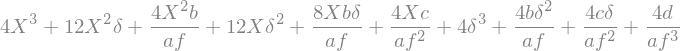

In [9]:
transformed_poly = sp.expand(4 * transformed_poly / transformed_poly.coeff(X,3))
transformed_poly

Lets get the individual coefficients 

In [10]:
coeffs = [transformed_poly.coeff(X,n) for n in range(0,4)]

Now we can solve for the value of $\delta$ that eliminates the $X^2$ term

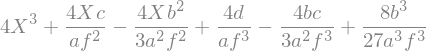

In [11]:
delta_soln = sp.solve(coeffs[2],delta)
delta_rule = {delta:delta_soln[0]}
sp.expand(transformed_poly.xreplace(delta_rule))

Our goal is to use the substitution $X = \sin\theta$, along with the identity 
$\sin(3\theta) =  3 \sin{\left(\theta \right)}- 4 \sin^{3}{\left(\theta \right)}$
to eliminate cubic terms.

Thus, we want solve for $f$ such that the coefficient of the linear term to be $-3/4$ the coefficient of the cubic term

In [12]:
coeffs[3]

There are 2 $f$ solutions; lets throw caution to the wind and randomly choose the first one

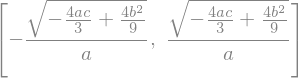

In [13]:
fsoln = sp.solve((coeffs[1]/coeffs[3]).xreplace(delta_rule)+sp.S(3)/4,f)
fsoln

In [14]:
f_rule = {f:fsoln[0]}

Now our expression becomes:

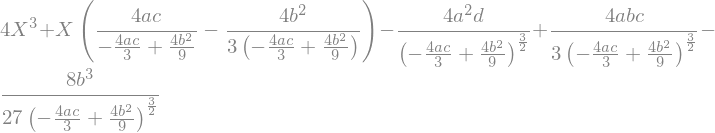

In [15]:
exprn=sp.collect(transformed_poly.xreplace(delta_rule).xreplace({f:fsoln[0]}),X)
exprn

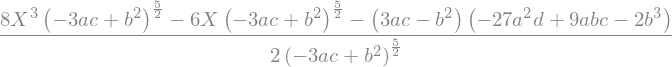

In [16]:
sp.simplify(exprn)

Unfortunately, `sp.simplify` isn't giving us what we want-- the coefficient of $X$ should simply be $-3$.

We can try holding its hand with the following "term-wise" simplification:

(See [here](http://certik.github.io/scipy-2013-tutorial/html/tutorial/manipulation.html#recursing-through-an-expression-tree) to understand more about whats going on here and why this works.)

In [17]:
exprn_simplified = exprn.func(*[sp.simplify(a) for a in exprn.args])

Now we can do our substitution:

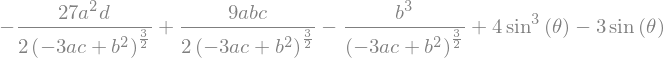

In [18]:
theta = sp.symbols("theta")
sin_theta = sp.sin(theta)
exprn_trig = exprn_simplified.subs({X:sin_theta})
exprn_trig

`trigsimp` doesn't give us exaclty what we want:

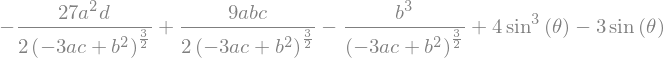

In [19]:
sp.trigsimp(exprn_trig)

... getting Sympy to simplify trignometric functions in the way one wants is a subtle art and has been the source of many headachse for me.

Below are a couple ways to get it to implement the desired identity in reverse


## method 1
using `rewrite` to go between trigonomentric fucntions and exponentials. (Something like a poor astronomer's version of Mathematica's `ExpToTrig` and `TrigToExp`...)

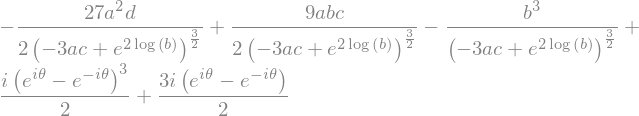

In [20]:
temp = exprn_trig.rewrite(sp.exp)
temp

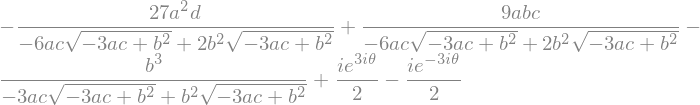

In [21]:
temp  = sp.expand(temp)
temp

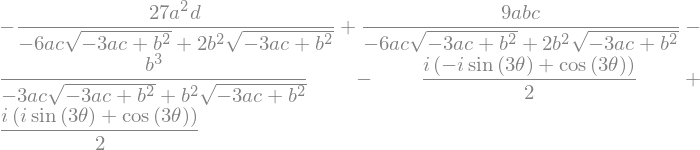

In [22]:
temp = temp.rewrite(sp.sin)
temp

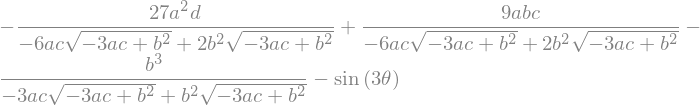

In [23]:
sp.expand(temp)

... finally!

## method 2

There are lots of lower level functions for performing specific trignometric substitutions detailed here: https://docs.sympy.org/latest/modules/simplify/fu.html

It turns out that `TR8` happens to be what we want in this instance (who knew!)

In [24]:
from sympy.simplify.fu import TR8

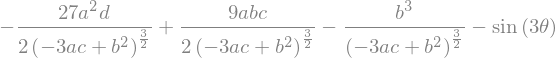

In [25]:
final = TR8(exprn_trig)
final

In [ ]:
sp.solve(final,theta)